<a href="https://colab.research.google.com/github/PavicicJadranko/Digit-Recognizer-using-Machine-Learning/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Multi-class Digit Classificaton

In this notebook we'll try to make a ML model which correctly identify digits from a dataset of tens of thousands of handwritten images.



## 1. Problem
Identifying a digit given an image of a digit.

## 2. Data
The data we are using is from Kaggle's digit recognizer competition:
https://www.kaggle.com/competitions/digit-recognizer/overview

The data files, train.csv and test.csv, contain gray-scale images of hand-drawn digits, where each image has dimensions of 28x28 pixels, totaling 784 pixels. Each pixel value ranges from 0 to 255, indicating lightness or darkness.

## 3. Evaluation

The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every in the test set, you should predict the correct label.

This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

## 4. Features

The train.csv file includes 785 columns, with the first column representing the digit label, while the remaining columns provide pixel values identified as pixelx (where x ranges from 0 to 783), mapped onto a 28x28 matrix according to specified indexing rules.

## Modeling

* Objective: Develop a machine learning model that accurately identifies handwritten digit images (0-9).

* Dataset: Utilize the MNIST dataset, which contains 70,000 images of handwritten digits.

* Preprocessing: Normalize the pixel values to improve model performance.
Reshape images to fit the input requirement of the model.
* Model Selection: Choose a suitable model architecture (e.g., Convolutional Neural Network) for better accuracy.
* Training: Split the dataset into training and test sets.
Train the model on the training set while validating performance on the test set.
* Evaluation Metrics: Use accuracy, confusion matrix, and F1-score to evaluate the model’s performance.

## Get our workspace ready

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [29]:
# Load the data
train_df = pd.read_csv("/content/drive/MyDrive/Digit Recognizer/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Digit Recognizer/test.csv")
train_df.shape, test_df.shape

((42000, 785), (28000, 784))

In [8]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
X_train.shape, y_train.shape

((42000, 784), (42000,))

In [30]:
# Scale the pixel values from 0-255 to 0-1
X_train = X_train / 255.0
test_df = test_df / 255.0


In [32]:
# Reshape the training and test data to a 28x28 pixel image
X_train = X_train.values.reshape(-1, 28, 28, 1)
test_df = test_df.values.reshape(-1, 28, 28, 1)

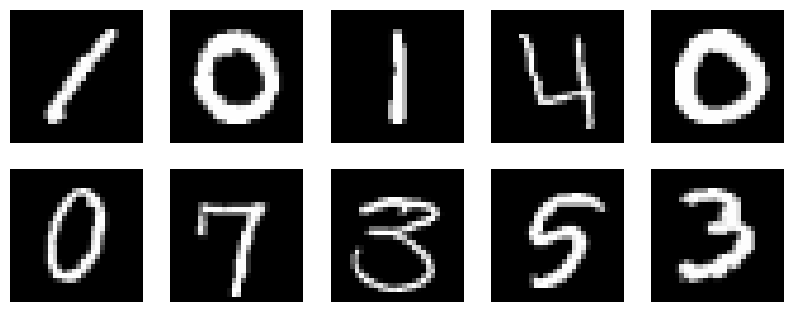

In [37]:
# Visualize the images in the train dataframe
%matplotlib inline
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap="grey")
    plt.axis('off')
plt.show()